In [4]:
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform
from sklearn_extra.cluster import KMedoids
from tslearn.metrics import cdist_dtw
import matplotlib.cm as cm
import os
from dotenv import load_dotenv

load_dotenv()
BASE_DATA_PATH = os.environ.get('BASE_DATA_PATH')

In [5]:
df_pivot = pd.read_csv('v2_df_pivot.csv', header=[0, 1], index_col=0)
print(df_pivot.columns)
df_pivot

MultiIndex([('rain', '2019-07-01 00:00:00+00:00'),
            ('rain', '2019-07-02 00:00:00+00:00'),
            ('rain', '2019-07-03 00:00:00+00:00'),
            ('rain', '2019-07-04 00:00:00+00:00'),
            ('rain', '2019-07-05 00:00:00+00:00'),
            ('rain', '2019-07-06 00:00:00+00:00'),
            ('rain', '2019-07-07 00:00:00+00:00'),
            ('rain', '2019-07-08 00:00:00+00:00'),
            ('rain', '2019-07-10 00:00:00+00:00'),
            ('rain', '2019-07-11 00:00:00+00:00'),
            ...
            ('wind', '2023-01-14 00:00:00+00:00'),
            ('wind', '2023-01-15 00:00:00+00:00'),
            ('wind', '2023-01-16 00:00:00+00:00'),
            ('wind', '2023-01-19 00:00:00+00:00'),
            ('wind', '2023-01-20 00:00:00+00:00'),
            ('wind', '2023-01-22 00:00:00+00:00'),
            ('wind', '2023-01-23 00:00:00+00:00'),
            ('wind', '2023-01-24 00:00:00+00:00'),
            ('wind', '2023-01-25 00:00:00+00:00'),
            ('w

rain                            \
date       2019-07-01 00:00:00+00:00 2019-07-02 00:00:00+00:00   
station_id                                                       
2592                        -0.36005                 -0.360050   
2685                        -0.36005                 -0.360050   
3145                        -0.36005                 -0.307177   
3445                        -0.36005                 -0.360050   
8567                        -0.36005                 -0.333613   
12442                       -0.36005                 -0.333613   
18234                       -0.36005                 -0.360050   
21938                       -0.36005                 -0.360050   
25354                       -0.36005                 -0.360050   
25531                       -0.36005                 -0.148558   
31857                       -0.36005                 -0.360050   
40750                       -0.36005                 -0.333613   
40984                       -0.36005                 -0.360050   
41212                       -0.36005                 -0.360050   
41229                       -0.35344                 -0.360050   
41559                       -0.36005                 -0.122121   

                                                                \
date       2019-07-03 00:00:00+00:00 2019-07-04 00:00:00+00:00   
station_id                                                       
2592                       -0.360050                  2.072104   
2685                       -0.148558                 -0.095685   
3145                        6.249065                 -0.174994   
3445                        2.574397                  0.062934   
8567                        5.085860                 -0.201431   
12442                       5.958263                 -0.227867   
18234                       0.803155                 -0.280740   
21938                       0.168680                  0.380171   
25354                       3.631855                  0.406608   
25531                       2.865198                  0.538790   
31857                      -0.135340                  2.468651   
40750                       2.521524                  0.247989   
40984                      -0.227867                  0.882464   
41212                       1.754867                  0.221553   
41229                       0.386780                 -0.260913   
41559                       3.711165                  0.882464   

                                                                \
date       2019-07-05 00:00:00+00:00 2019-07-06 00:00:00+00:00   
station_id                                                       
2592                        0.327298                  0.089370   
2685                        0.829591                  0.168680   
3145                       -0.095685                 -0.267522   
3445                        0.076152                 -0.148558   
8567                       -0.042812                 -0.227867   
12442                      -0.042812                 -0.254304   
18234                      -0.333613                 -0.148558   
21938                       0.776718                  0.142243   
25354                       0.089370                 -0.069249   
25531                      -0.148558                 -0.174994   
31857                       2.759452                  0.578445   
40750                       1.464066                  0.168680   
40984                       0.327298                 -0.148558   
41212                       0.274425                  0.036497   
41229                      -0.227867                 -0.300567   
41559                      -0.174994                  0.406608   

                                                                \
date       2019-07-07 00:00:00+00:00 2019-07-08 00:00:00+00:00   
station_id                                                       
2592                       -0.360050                 -0.360050   
268

In [6]:
def elbow_plot_and_silhuette(data, k):
    list_n_clusters = []
    inertias = []

    for n_clusters in range(1, k):
        kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=14)
        kmeans.fit(data)
        list_n_clusters.append(n_clusters)
        inertias.append(kmeans.inertia_)
        if n_clusters > 1:
            print(f'n_clusters: {n_clusters}, silhuette score: {silhouette_score(data, kmeans.labels_).round(5)}')
  
    plt.plot(list_n_clusters, inertias, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Plot')
    plt.grid(True)
    plt.show()

n_clusters: 2, silhuette score: 0.22668
n_clusters: 3, silhuette score: 0.22673
n_clusters: 4, silhuette score: 0.20715
n_clusters: 5, silhuette score: 0.19882
n_clusters: 6, silhuette score: 0.18142
n_clusters: 7, silhuette score: 0.18592
n_clusters: 8, silhuette score: 0.17734


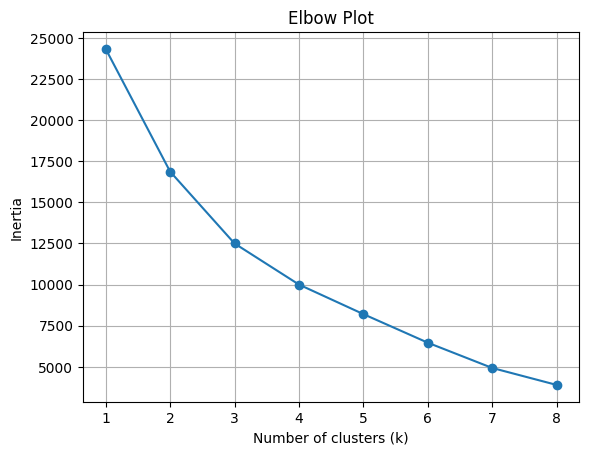

In [7]:
elbow_plot_and_silhuette(df_pivot, 9)

(16, 3756)

For n_clusters = 2 The average silhouette_score is : 0.22667807988130162
cluster: 1, len_values: 8, cluster_silhouette_sample_values: [0.17423787 0.17707214 0.18329101 0.18539301 0.20828141 0.21482197
 0.25275511 0.29768563]
cluster: 2, len_values: 8, cluster_silhouette_sample_values: [0.06147129 0.12052369 0.14859576 0.25062741 0.30987276 0.31975338
 0.35393263 0.36853421]

For n_clusters = 3 The average silhouette_score is : 0.22673297727024339
cluster: 1, len_values: 7, cluster_silhouette_sample_values: [0.12247823 0.14887154 0.18920161 0.34774431 0.3728626  0.42186201
 0.43670086]
cluster: 2, len_values: 6, cluster_silhouette_sample_values: [0.13425698 0.14624697 0.15134276 0.20610444 0.23306962 0.28760067]
cluster: 3, len_values: 3, cluster_silhouette_sample_values: [0.02102568 0.1907123  0.21764706]

For n_clusters = 4 The average silhouette_score is : 0.20715221076308396
cluster: 1, len_values: 6, cluster_silhouette_sample_values: [0.09327718 0.10349229 0.12125228 0.

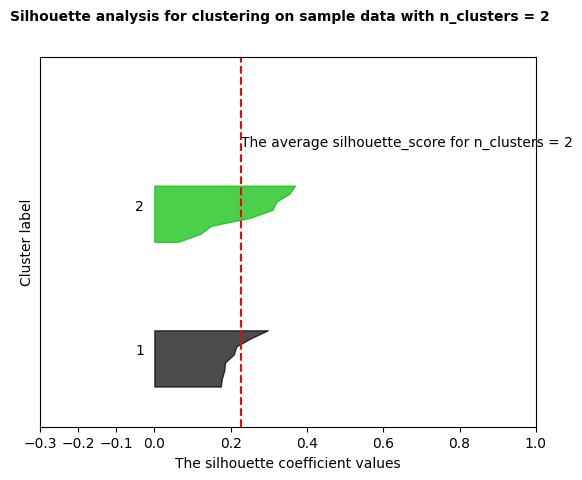

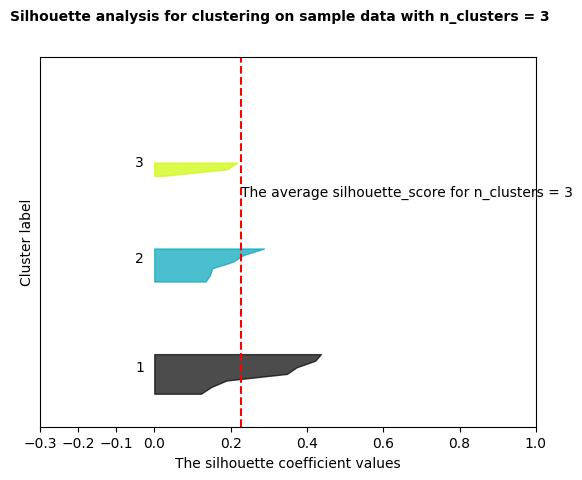

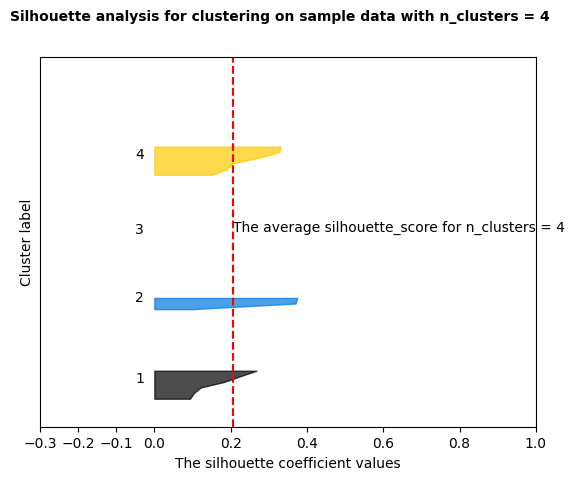

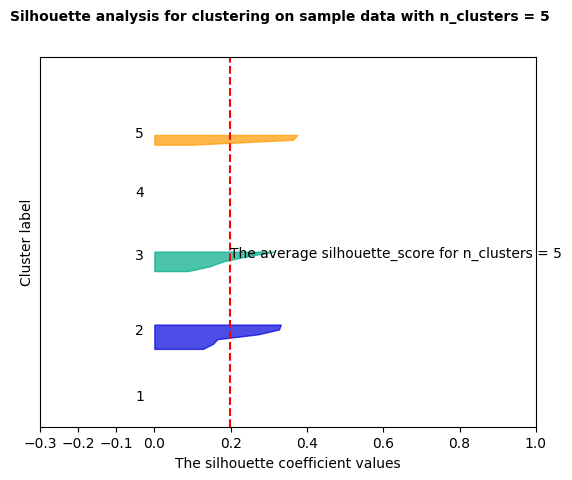

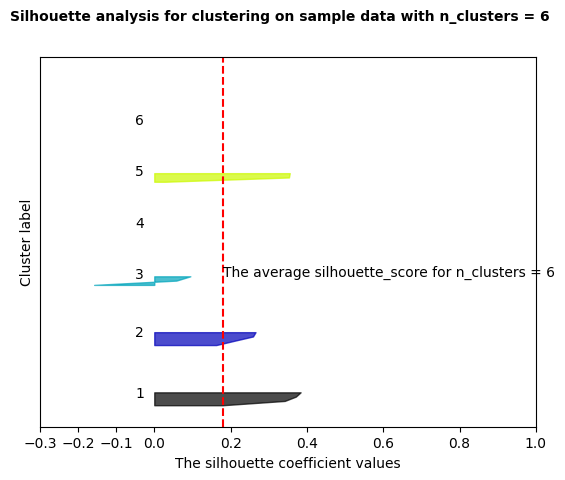

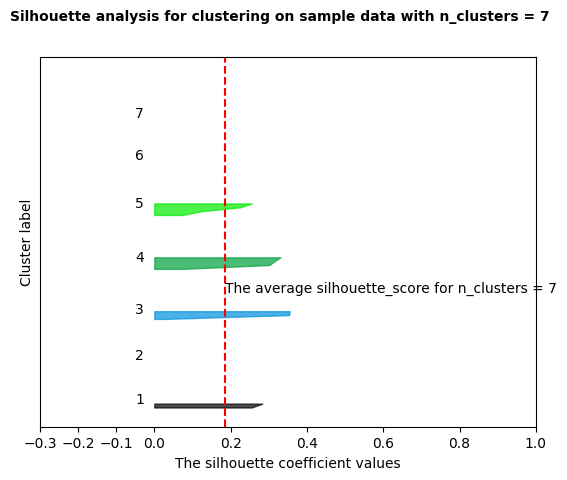

In [8]:
X = df_pivot
print(X.shape)

for n_clusters in range(2, 8):

    fig, ax1 = plt.subplots(1, 1)

    ax1.set_xlim([-0.3, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, n_init=20, random_state=14) 
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples (all 16 stations) for given n_clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f'\nFor n_clusters = {n_clusters} The average silhouette_score is : {silhouette_avg}')

    # Compute the silhouette scores for each sample (station) in the cluster
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 5
    for i in range(n_clusters):
        # Aggregate the silhouette_samples scores for each cluster i
        cluster_silhouette_sample_values = sample_silhouette_values[cluster_labels == i]
        cluster_silhouette_sample_values.sort()
        print(f'cluster: {i+1}, len_values: {len(cluster_silhouette_sample_values)}, cluster_silhouette_sample_values: {cluster_silhouette_sample_values}')

        size_cluster_i = cluster_silhouette_sample_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            cluster_silhouette_sample_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.annotate(text=f'The average silhouette_score for n_clusters = {n_clusters}', xy=(silhouette_avg, 35))

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.3, -0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        f'Silhouette analysis for clustering on sample data with n_clusters = {n_clusters}',
        fontsize=10,
        fontweight='bold',
    )
plt.show()

## Based on Silhuette Score and Elbow Plot the number of clusters is equal to 3

In [9]:
n_clusters = 3
X = df_pivot

In [10]:
kmeans_model = KMeans(n_clusters=n_clusters, n_init=20 ,random_state=14)
kmeans_model.fit_predict(X)
kmeans_labels = kmeans_model.labels_
print(kmeans_labels)

[1 1 0 1 0 0 1 2 0 0 2 0 2 1 1 0]


In [ ]:
kmedoids_model = KMedoids(n_clusters=n_clusters, random_state=14, metric='euclidean')#  metric="precomputed")
kmedoids_model.fit(X)
kmedoids_labels = kmedoids_model.labels_
print(kmedoids_labels)
print(X.index)

[1 1 2 1 2 2 1 0 1 1 0 0 0 1 1 0]
Index([ 2592,  2685,  3145,  3445,  8567, 12442, 18234, 21938, 25354, 25531,
       31857, 40750, 40984, 41212, 41229, 41559],
      dtype='int64', name='station_id')


In [24]:
dtw_distance_matrix = cdist_dtw(X.values)

In [18]:
kmedoids_model_dtw = KMedoids(n_clusters=n_clusters, random_state=14, metric='euclidean')#  metric="precomputed")
kmedoids_model_dtw.fit(dtw_distance_matrix)
kmedoids_labels_dtw = kmedoids_model_dtw.labels_
print(kmedoids_labels_dtw)
print(X.index)

[0 0 1 0 1 1 0 1 2 2 2 1 1 0 0 1]
Index([ 2592,  2685,  3145,  3445,  8567, 12442, 18234, 21938, 25354, 25531,
       31857, 40750, 40984, 41212, 41229, 41559],
      dtype='int64', name='station_id')


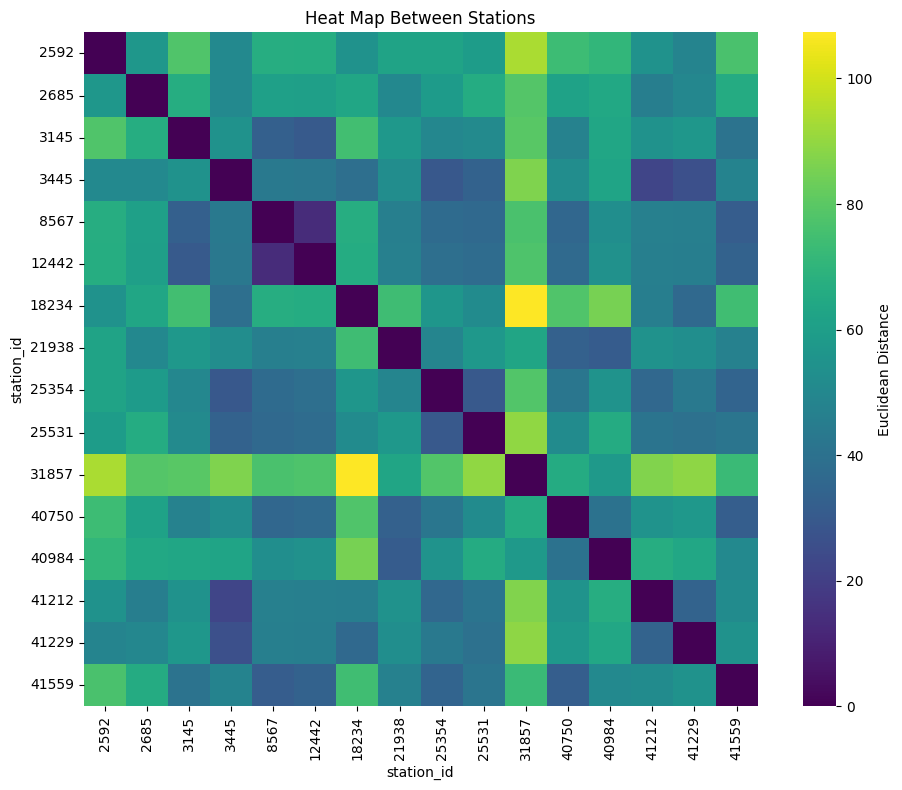

In [19]:
full_distance_matrix = squareform(pdist(X))
station_ids = [X.index]
distance_df = pd.DataFrame(full_distance_matrix, index=station_ids, columns=station_ids)
plt.figure(figsize=(10, 8))
sns.heatmap(distance_df, cmap='viridis', annot=False, square=True, cbar_kws={'label': 'Euclidean Distance'})
plt.title('Heat Map Between Stations')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

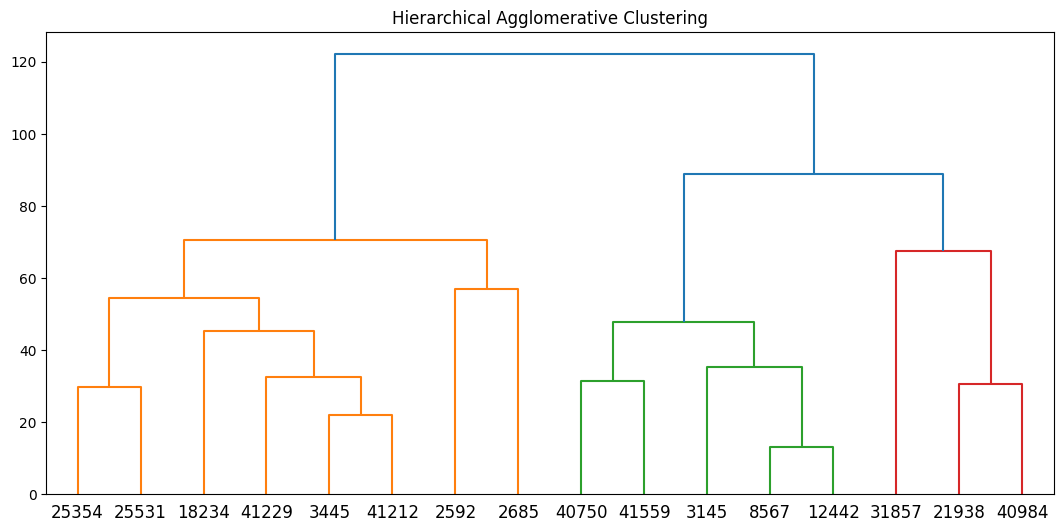

In [20]:
plt.figure(figsize=(13, 6))
Z = linkage(X, method='ward')
dendrogram(
        Z,
        orientation='top',
        labels=df_pivot.index,
        distance_sort='ascending',
        show_leaf_counts=False, 
)
plt.title('Hierarchical Agglomerative Clustering')
plt.show()

In [21]:
hierarchical_model = AgglomerativeClustering(n_clusters=n_clusters)
hierarchical_model.fit(X)
hierarchical_labels = hierarchical_model.labels_
print(hierarchical_labels)

[0 0 2 0 2 2 0 1 0 0 1 2 1 0 0 2]


In [25]:
hierarchical_model_dwt = AgglomerativeClustering(n_clusters=n_clusters)
hierarchical_model_dwt.fit(dtw_distance_matrix)
hierarchical_labels_dwt = hierarchical_model_dwt.labels_
print(hierarchical_labels_dwt)

[0 0 1 0 1 1 0 1 0 0 2 1 1 0 0 1]


c:\D\Whitireia\ARP\clustering-wellington-weather-stations\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


In [26]:
def print_scores(X, labels):
    """ Prints 3 Scores for given data and labels.
    X : A list of n_features-dimensional data points. Each row corresponds to a single data point., 
    labels : Predicted labels for each sample.
    """
    print("Silhouette Score:", (silhouette_score(X, labels)).round(5))
    print("Davies-Bouldin Index:", (davies_bouldin_score(X, labels)).round(5))
    print("Calinski-Harabasz Index:", (calinski_harabasz_score(X, labels)).round(5))

In [27]:
algorithm_results = {
    'KMeans': kmeans_labels, 
    'KMedoids': kmedoids_labels, 
    'KMedoids-DTW': kmedoids_labels_dtw,
    'AgglomerativeClustering': hierarchical_labels,
    'AgglomerativeClustering-DTW': hierarchical_labels_dwt,
}

for name in algorithm_results:
    print(f'\nScores for {name}:')
    print_scores(X, algorithm_results[name])


Scores for KMeans:
Silhouette Score: 0.22673
Davies-Bouldin Index: 1.21329
Calinski-Harabasz Index: 6.14896

Scores for KMedoids:
Silhouette Score: 0.17246
Davies-Bouldin Index: 1.18953
Calinski-Harabasz Index: 4.96884

Scores for KMedoids-DTW:
Silhouette Score: 0.16971
Davies-Bouldin Index: 2.18505
Calinski-Harabasz Index: 3.5441

Scores for AgglomerativeClustering:
Silhouette Score: 0.21122
Davies-Bouldin Index: 1.175
Calinski-Harabasz Index: 5.74915

Scores for AgglomerativeClustering-DTW:
Silhouette Score: 0.21226
Davies-Bouldin Index: 1.0675
Calinski-Harabasz Index: 5.51431


#### KMeans algorithm demonstrated better scores in 2 out of 3 metrics.

In [28]:
stations_path = pathlib.Path('stations.csv').resolve()
stations_to_map = pd.read_csv(stations_path).sort_values(['StationID']).reset_index(drop=True)
for name in algorithm_results:
    stations_to_map[name] = algorithm_results[name]
    print(name)
    display(stations_to_map.sort_values([name, 'StationID'], axis=0))

KMeans


,StationID,StationName,latitude,longitude,KMeans
2,3145,PARAPARAUMU AERO,-40.90700,174.98400,0
4,8567,PARAPARAUMU AERO AWS,-40.90455,174.98517,0
5,12442,PARAPARAUMU AERO EWS,-40.90392,174.98437,0
8,25354,"WELLINGTON, KELBURN AWS",-41.28445,174.76794,0
9,25531,MANA ISLAND AWS,-41.08676,174.77996,0
11,40750,"UPPER HUTT, TRENTHAM EWS",-41.14027,175.04283,0
15,41559,"PORIRUA, ELSDON PARK AWS",-41.12683,174.83531,0
0,2592,CASTLEPOINT AWS,-40.90416,176.21207,1
1,2685,NGAWI AWS,-41.58850,175.23370,1
3,3445,WELLINGTON AERO,-41.32200,174.80400,1


KMedoids


,StationID,StationName,latitude,longitude,KMeans,KMedoids
7,21938,MARTINBOROUGH EWS,-41.25231,175.38985,2,0
10,31857,"TE WHARAU, BRACKENFIELD",-41.17278,175.80063,2,0
11,40750,"UPPER HUTT, TRENTHAM EWS",-41.14027,175.04283,0,0
12,40984,MASTERTON EWS,-40.98155,175.67932,2,0
15,41559,"PORIRUA, ELSDON PARK AWS",-41.12683,174.83531,0,0
0,2592,CASTLEPOINT AWS,-40.90416,176.21207,1,1
1,2685,NGAWI AWS,-41.58850,175.23370,1,1
3,3445,WELLINGTON AERO,-41.32200,174.80400,1,1
6,18234,BARING HEAD,-41.40828,174.87146,1,1
8,25354,"WELLINGTON, KELBURN AWS",-41.28445,174.76794,0,1


KMedoids-DTW


,StationID,StationName,latitude,longitude,KMeans,KMedoids,KMedoids-DTW
0,2592,CASTLEPOINT AWS,-40.90416,176.21207,1,1,0
1,2685,NGAWI AWS,-41.58850,175.23370,1,1,0
3,3445,WELLINGTON AERO,-41.32200,174.80400,1,1,0
6,18234,BARING HEAD,-41.40828,174.87146,1,1,0
13,41212,"WELLINGTON, GRETA POINT CWS",-41.30243,174.80574,1,1,0
14,41229,WELLINGTON AERO BACKUP AWS,-41.33130,174.80566,1,1,0
2,3145,PARAPARAUMU AERO,-40.90700,174.98400,0,2,1
4,8567,PARAPARAUMU AERO AWS,-40.90455,174.98517,0,2,1
5,12442,PARAPARAUMU AERO EWS,-40.90392,174.98437,0,2,1
7,21938,MARTINBOROUGH EWS,-41.25231,175.38985,2,0,1


AgglomerativeClustering


,StationID,StationName,latitude,longitude,KMeans,KMedoids,KMedoids-DTW,AgglomerativeClustering
0,2592,CASTLEPOINT AWS,-40.90416,176.21207,1,1,0,0
1,2685,NGAWI AWS,-41.58850,175.23370,1,1,0,0
3,3445,WELLINGTON AERO,-41.32200,174.80400,1,1,0,0
6,18234,BARING HEAD,-41.40828,174.87146,1,1,0,0
8,25354,"WELLINGTON, KELBURN AWS",-41.28445,174.76794,0,1,2,0
9,25531,MANA ISLAND AWS,-41.08676,174.77996,0,1,2,0
13,41212,"WELLINGTON, GRETA POINT CWS",-41.30243,174.80574,1,1,0,0
14,41229,WELLINGTON AERO BACKUP AWS,-41.33130,174.80566,1,1,0,0
7,21938,MARTINBOROUGH EWS,-41.25231,175.38985,2,0,1,1
10,31857,"TE WHARAU, BRACKENFIELD",-41.17278,175.80063,2,0,2,1


AgglomerativeClustering-DTW


,StationID,StationName,latitude,longitude,KMeans,KMedoids,KMedoids-DTW,AgglomerativeClustering,AgglomerativeClustering-DTW
0,2592,CASTLEPOINT AWS,-40.90416,176.21207,1,1,0,0,0
1,2685,NGAWI AWS,-41.58850,175.23370,1,1,0,0,0
3,3445,WELLINGTON AERO,-41.32200,174.80400,1,1,0,0,0
6,18234,BARING HEAD,-41.40828,174.87146,1,1,0,0,0
8,25354,"WELLINGTON, KELBURN AWS",-41.28445,174.76794,0,1,2,0,0
9,25531,MANA ISLAND AWS,-41.08676,174.77996,0,1,2,0,0
13,41212,"WELLINGTON, GRETA POINT CWS",-41.30243,174.80574,1,1,0,0,0
14,41229,WELLINGTON AERO BACKUP AWS,-41.33130,174.80566,1,1,0,0,0
2,3145,PARAPARAUMU AERO,-40.90700,174.98400,0,2,1,2,1
4,8567,PARAPARAUMU AERO AWS,-40.90455,174.98517,0,2,1,2,1


#### Distribution of stations on the map according to the KMeans result

,StationID,StationName,latitude,longitude,KMeans,KMedoids,AgglomerativeClustering
2,3145,PARAPARAUMU AERO,-40.90700,174.98400,0,2,2
4,8567,PARAPARAUMU AERO AWS,-40.90455,174.98517,0,2,2
5,12442,PARAPARAUMU AERO EWS,-40.90392,174.98437,0,2,2
8,25354,"WELLINGTON, KELBURN AWS",-41.28445,174.76794,0,1,0
9,25531,MANA ISLAND AWS,-41.08676,174.77996,0,1,0
11,40750,"UPPER HUTT, TRENTHAM EWS",-41.14027,175.04283,0,0,2
15,41559,"PORIRUA, ELSDON PARK AWS",-41.12683,174.83531,0,0,2
0,2592,CASTLEPOINT AWS,-40.90416,176.21207,1,1,0
1,2685,NGAWI AWS,-41.58850,175.23370,1,1,0
3,3445,WELLINGTON AERO,-41.32200,174.80400,1,1,0


Cluster: 0, Colour: darkgreen
Cluster: 1, Colour: darkred
Cluster: 2, Colour: yellow


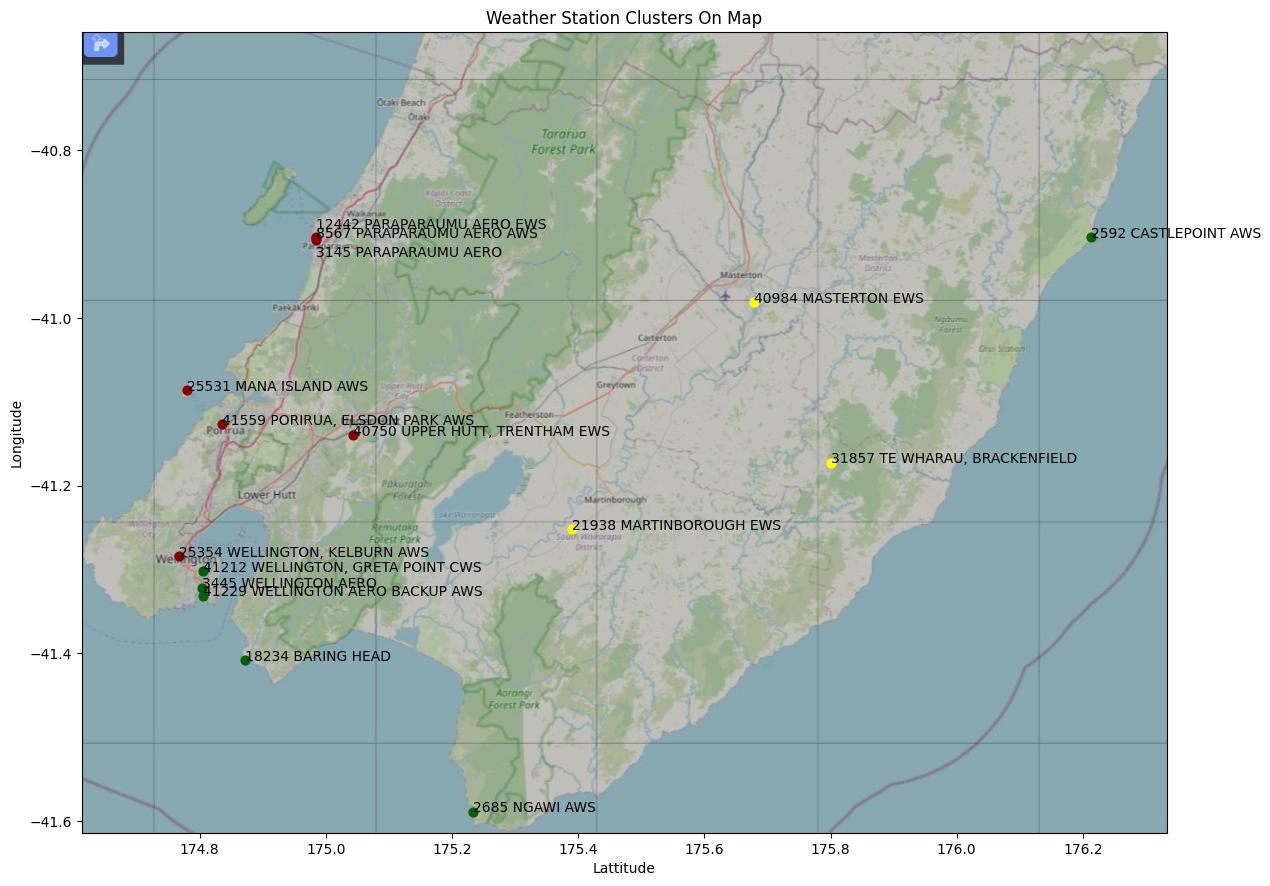

In [101]:
display(stations_to_map.sort_values(['KMeans', 'StationID'], axis=0))

bounds = (
        174.613136, 176.332929, # longitude - X
        -41.613738, -40.65948 # latitude - Y
)

# stations_to_map['cluster'] = kmeans_labels
# stations_to_map['cluster'] = kmedoids_labels 
# stations_to_map['cluster'] = hierarchical_labels 

n_clusters = stations_to_map['KMeans'].unique()

colours = {
    0: 'darkgreen', 
    1: 'darkred', 
    2: 'yellow',
    3: 'blue',
    4: 'purple',
    5: 'pink'
}

fig, ax = plt.subplots(figsize = (14,12))
ax.set_title('Weather Station Clusters On Map')
ax.set_xlabel('Lattitude')
ax.set_ylabel('Longitude')

for i in range(len(n_clusters)):
        df_temp = stations_to_map.loc[stations_to_map['KMeans'] == n_clusters[i]]
        ax.scatter(df_temp['longitude'], df_temp['latitude'], zorder=1, alpha=1, c=colours[i], s=40)
        print(f'Cluster: {i}, Colour: {colours[i]}')

x = stations_to_map['longitude']
y = stations_to_map['latitude']

station_name = stations_to_map['StationName'] + stations_to_map['StationID'].astype(str)
station_name = stations_to_map['StationID'].astype(str) + " " + stations_to_map['StationName']
# print(type(station_name), station_name)
for i, txt in enumerate(station_name):
    y_i = y[i]
    if txt == '3145 PARAPARAUMU AERO':
        y_i = y[i] - 0.02
    elif txt == '12442 PARAPARAUMU AERO EWS':
        y_i = y[i] + 0.01
    ax.annotate(txt, (x[i], y_i))

img_path = pathlib.Path('greater_wellington_map.jpg').resolve()
img = plt.imread(img_path)
ext = bounds
ax.imshow(img, zorder=0, extent=ext)

aspect=img.shape[0]/float(img.shape[1])*((ext[1]-ext[0])/(ext[3]-ext[2]))
plt.gca().set_aspect(aspect)

plt.show()